# White Wine Machine Learning Model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
path = 'Resources/WhiteWine_dataset.csv'
white_wine_df1 = pd.read_csv(path)
white_wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
white_wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
white_wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# Check for null values
white_wine_df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Sort quality values
white_wine_df1['quality'].value_counts().sort_values() 

9       5
3      20
4     163
8     175
7     880
5    1457
6    2198
Name: quality, dtype: int64

In [7]:
# Check value counts
for col in white_wine_df1:
    print(white_wine_df1[col].value_counts(ascending=False), '\n')

6.8     308
6.6     290
6.4     280
6.9     241
6.7     236
       ... 
4.5       1
4.6       1
11.8      1
14.2      1
3.9       1
Name: fixed acidity, Length: 68, dtype: int64 

0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.545      1
0.135      1
0.905      1
0.685      1
0.355      1
Name: volatile acidity, Length: 125, dtype: int64 

0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
1.23      1
0.86      1
0.11      1
0.99      1
Name: citric acid, Length: 87, dtype: int64 

1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
6.75       1
12.75      1
8.55       1
4.35       1
18.40      1
Name: residual sugar, Length: 310, dtype: int64 

0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.217      1
0.148      1
0.158      1
0.099      1
0.136      1
Name: chlorides, Length: 160, dtype: int64 

29.0     160
31.0     132
26.0     129
35.0     129
34.0     128
 

In [8]:
# Show rows and columns of original dataset
white_wine_df1.shape

(4898, 12)

In [9]:
# Drop Duplicates
# Show rows and columns of updated dataset
white_wine=white_wine_df1.copy()
white_wine.drop_duplicates(subset=None,inplace=True)
white_wine.shape

(3961, 12)

In [10]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


###### No categorical variables found in dataset // All variables are qualitative

### Correlation Heatmap

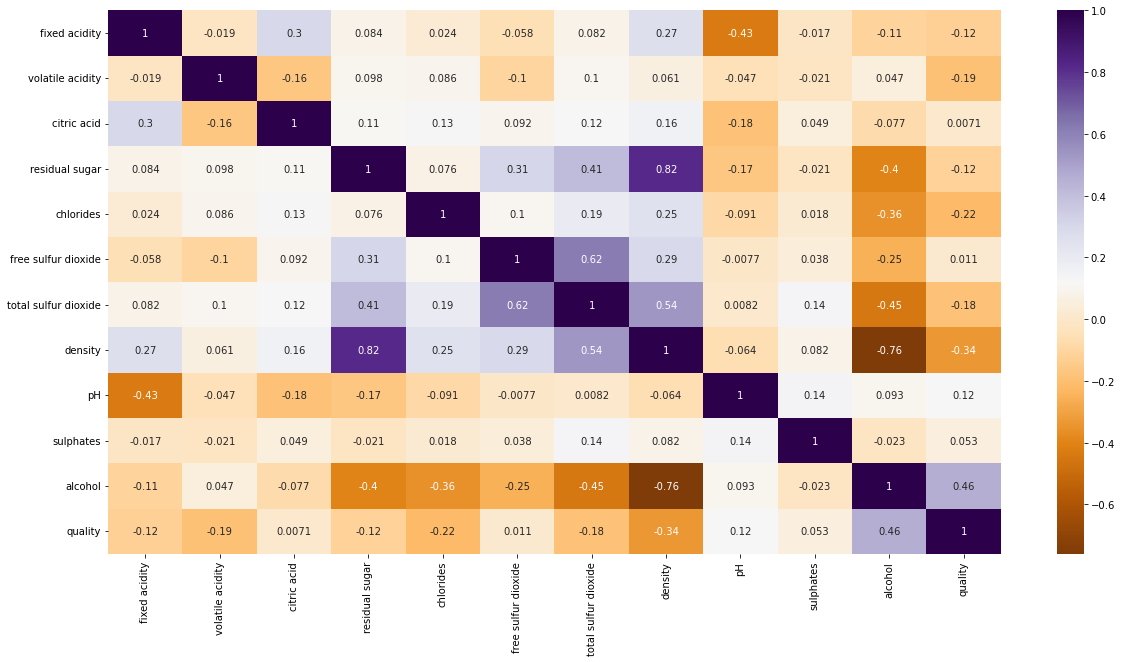

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(white_wine.corr(), annot=True,cmap='PuOr')
plt.show()

### Pairplot

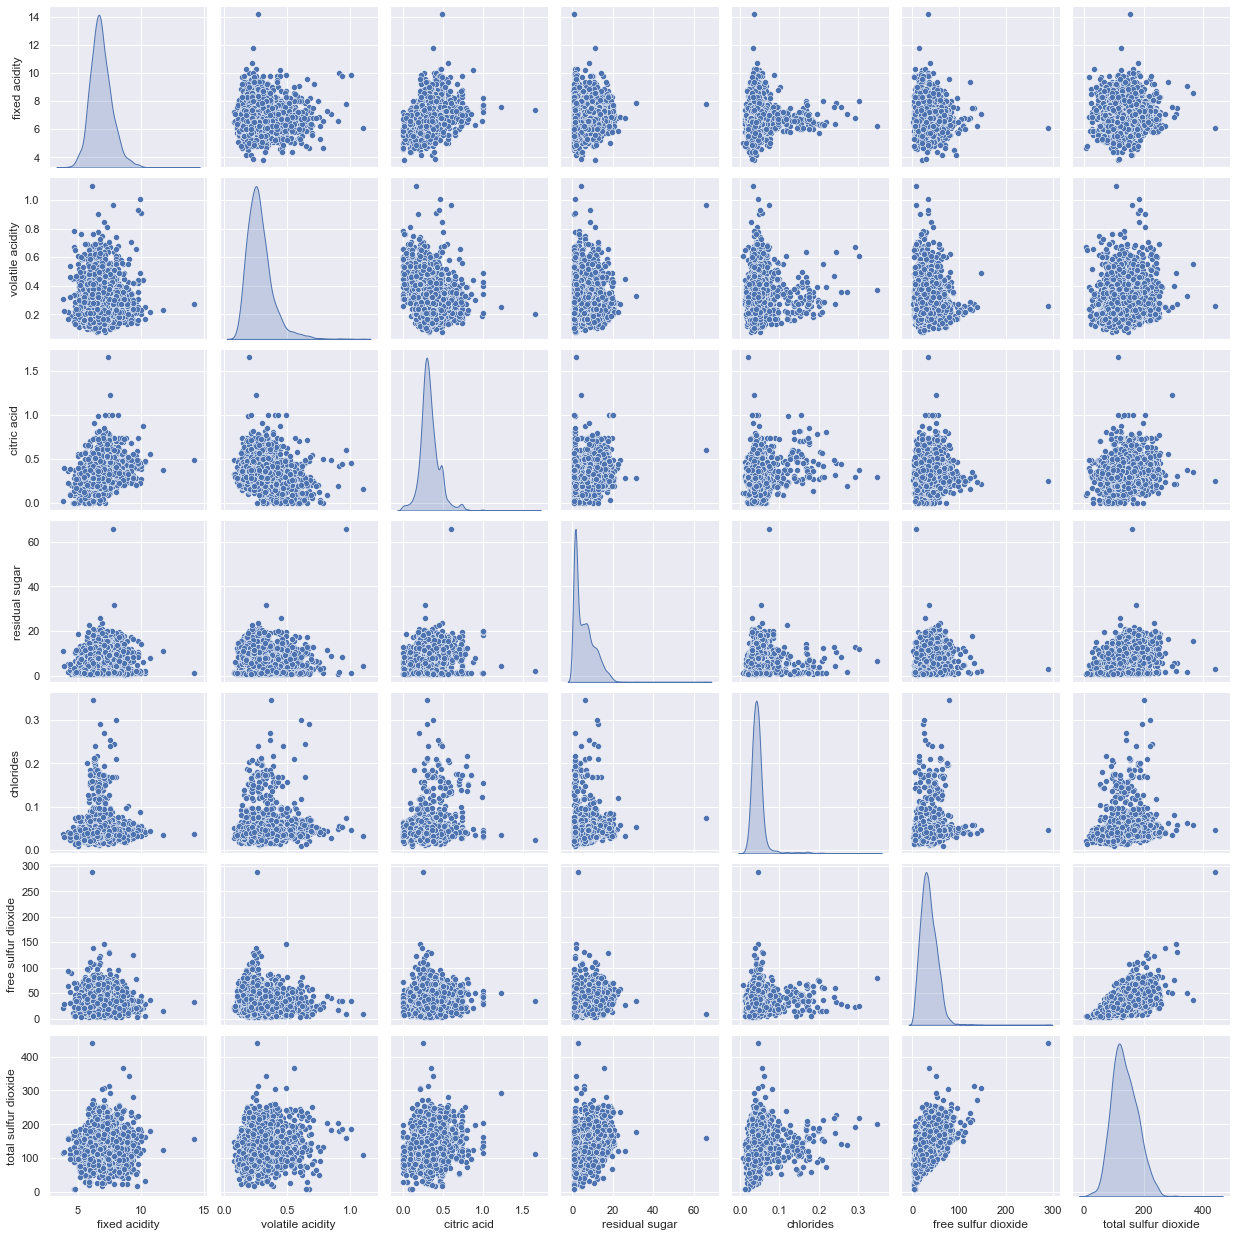

In [12]:
# Multi-Variate Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = white_wine.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')

### Bar Chart

No handles with labels found to put in legend.


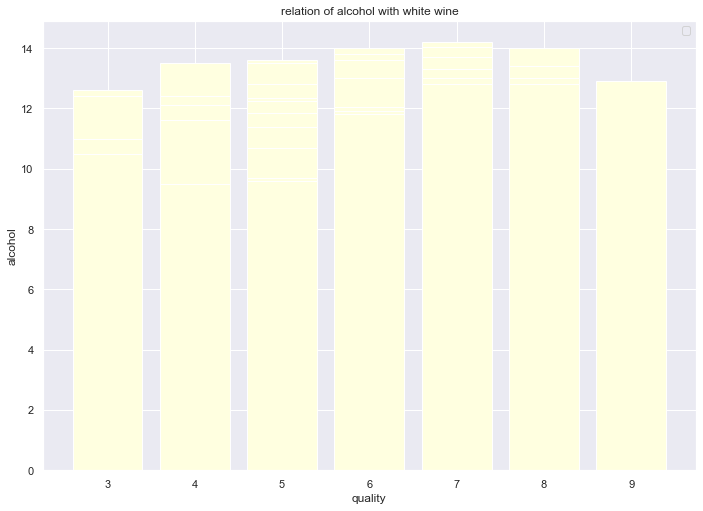

In [13]:
# checking the variation of alcohol in the different qualities of wine

plt.bar(white_wine['quality'], white_wine['alcohol'], color = 'lightyellow')
plt.title('relation of alcohol with white wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

## Split the Data into Training and Testing

In [14]:
#dropping columns
white_wine.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH'], axis = 1, inplace = True)
white_wine

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.27,0.36,0.45,8.8,6
1,0.30,0.34,0.49,9.5,6
2,0.28,0.40,0.44,10.1,6
3,0.23,0.32,0.40,9.9,6
6,0.32,0.16,0.47,9.6,6
...,...,...,...,...,...
4893,0.21,0.29,0.50,11.2,6
4894,0.32,0.36,0.46,9.6,5
4895,0.24,0.19,0.46,9.4,6
4896,0.29,0.30,0.38,12.8,7


In [15]:
# Dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

np.random.seed(0)
df_train,df_test=train_test_split(white_wine,train_size=0.7,test_size=0.3,random_state=100)

In [16]:
# Create our features
#X = white_wine[list(white_wine.columns)[:-1]]

# Create our target
#y = white_wine['quality']

X = white_wine.filter(items=['alcohol', 'volatile acidity' ,'sulphates', 'citric acid'])
y = white_wine['quality']

In [17]:
X.describe()

,alcohol,volatile acidity,sulphates,citric acid
count,3961.000000,3961.000000,3961.000000,3961.000000
mean,10.589358,0.280538,0.490351,0.334332
std,1.217076,0.103437,0.113523,0.122446
min,8.000000,0.080000,0.220000,0.000000
25%,9.500000,0.210000,0.410000,0.270000
50%,10.400000,0.260000,0.480000,0.320000
75%,11.400000,0.330000,0.550000,0.390000
max,14.200000,1.100000,1.080000,1.660000


In [18]:
y.describe()

count    3961.000000
mean        5.854835
std         0.890683
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [19]:
y.value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [21]:
# Training model info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 1717 to 1834
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  2772 non-null   float64
 1   citric acid       2772 non-null   float64
 2   sulphates         2772 non-null   float64
 3   alcohol           2772 non-null   float64
 4   quality           2772 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 129.9 KB


In [22]:
# Testing model info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1119 to 991
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  1189 non-null   float64
 1   citric acid       1189 non-null   float64
 2   sulphates         1189 non-null   float64
 3   alcohol           1189 non-null   float64
 4   quality           1189 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 55.7 KB


In [23]:
df_train.shape

(2772, 5)

In [24]:
df_test.shape

(1189, 5)

## Rescaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train.head()

,volatile acidity,citric acid,sulphates,alcohol,quality
1717,0.27,0.32,0.43,9.9,6
671,0.28,0.36,0.57,11.6,6
1719,0.23,0.27,0.31,9.4,6
813,0.26,0.32,0.46,9.5,6
304,0.41,0.24,0.41,9.9,6


In [26]:
df_train[:]=scaler.fit_transform(df_train[:])
df_train.head()

/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,volatile acidity,citric acid,sulphates,alcohol,quality
1717,0.186275,0.192771,0.235294,0.306452,0.5
671,0.196078,0.216867,0.400000,0.580645,0.5
1719,0.147059,0.162651,0.094118,0.225806,0.5
813,0.176471,0.192771,0.270588,0.241935,0.5
304,0.323529,0.144578,0.211765,0.306452,0.5


## Linear Regression

In [27]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[7.07989638 6.10121969 5.2944962  ... 5.61004679 5.16983597 6.05778223]
[6.05419685 6.55887596 6.20893611 6.50644341 5.66451684 6.42334518
 6.55145599 5.87694    6.41246296 6.14415751 5.54375327 5.862344
 5.68305157 6.23006673 5.37592121 6.42020105 6.4730914  6.71792441
 5.95832588 6.18695719 5.79251364 6.03051651 6.2563899  5.56965529
 5.5670337  6.07375405 5.90651253 6.01884246 6.44718744 5.10531501
 6.12999977 6.18423897 6.11709959 6.36671506 5.26158153 6.07809746
 6.44067638 5.81289234 6.24974592 5.95271211 6.09674801 5.86478334
 5.41413513 6.09016213 5.6272279  5.51545506 5.14314233 6.65479705
 5.33291056 5.89480699 5.18841946 6.01814843 5.2766897  6.24434029
 5.83982012 5.60056395 6.8266292  6.44800714 4.92797842 5.65971354
 5.93713381 5.74855387 5.91859856 5.43409662 5.74822193 5.93280427
 5.74396347 5.16660545 6.22493092 6.07240513 5.81272805 6.37802483
 5.38334995 5.88291255 5.26688209 5.0508227  6.05682689 5.05913842
 5.50134716 6.12879597 5.68189664 6.28679001 4.98059249 6.4

In [29]:
# calculating Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.7631840509039332
0.7687203437233103


In [30]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 7. 6. 7. 6. 6. 7. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 7. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 5. 7.
 5. 6. 5. 6. 5. 6. 6. 6. 7. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 7. 5. 6. 5. 7. 5. 6.
 5. 5. 6. 6. 5. 6. 5. 6. 5. 5. 5. 6. 6. 5. 7. 7. 6. 6. 5. 7. 7. 6. 5. 6.
 6. 6. 6. 5. 6. 5. 7. 6. 6. 5. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 6.
 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 7. 6. 6. 7. 6. 5. 7. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 5. 7. 6. 6. 6. 6. 6. 7. 5. 7. 5. 6. 6. 6. 7. 6. 6. 6. 6. 6. 6.
 5. 6. 6. 5. 7. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 5. 5. 6. 5.
 6. 7. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 5. 6. 6. 5.
 7. 6. 6. 6. 7. 6. 6. 6. 5. 6. 5. 6. 6. 5. 5. 7. 5. 6. 6. 6. 7. 6. 6. 5.
 7. 6. 6. 5. 6. 5. 6. 7. 6. 6. 6. 6. 7. 5. 5. 7. 6. 6. 5. 6. 6. 6. 6. 6.
 6. 6. 7. 6. 5. 6. 6. 5. 6. 6. 6. 7. 5. 6. 5. 6. 5. 5. 6. 6. 6. 7. 5. 6.
 6. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 6.

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5996854448156429
Mean Squared Error: 0.5909309668540844
Root Mean Squared Error: 0.7687203437233103


### Balanced Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [33]:
X = white_wine.filter(items=['alcohol', 'sulphates', 'total sulfur dioxide'])
y = white_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred = clf.predict(X_test)

In [35]:
print('Training Accuracy of Random Forest: ', clf.score(X_train, y_train))
print('Test Accuracy of Random Forest: ', clf.score(X_test, y_test))

Training Accuracy of Random Forest:  0.7370580808080808
Test Accuracy of Random Forest:  0.4287515762925599


In [36]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.4287515762925599


### Decision Tree

In [37]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [38]:
X = white_wine.filter(items=['alcohol', 'sulphates', 'total sulfur dioxide'])
y = white_wine['quality']

In [39]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.07      0.11      0.08        38
           5       0.42      0.49      0.46       294
           6       0.51      0.50      0.50       447
           7       0.41      0.27      0.32       173
           8       0.05      0.03      0.04        33
           9       0.00      0.00      0.00         1

    accuracy                           0.42       991
   macro avg       0.21      0.20      0.20       991
weighted avg       0.43      0.42      0.42       991

